<a href="https://colab.research.google.com/github/Milind305/Neural-Networks/blob/main/Neural_Network_assignment_Gas_turbine_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
# importing necessary packages
import tensorflow as tf

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam


In [44]:
# Loading dataset
turbine_data= pd.read_csv('/content/gas_turbines.csv')

In [47]:
# copy the data 
df= turbine_data.copy()

In [138]:
# Head of data
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [48]:
# Describe data
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [49]:
# Describe data
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [56]:
# Checking for null values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1452e69d0>,
      dtype=object)

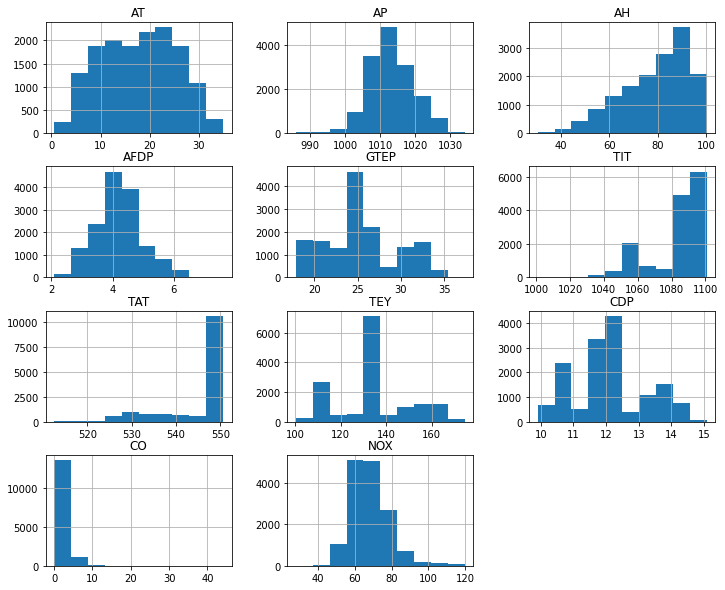

In [57]:
df.hist(figsize= (12,10))

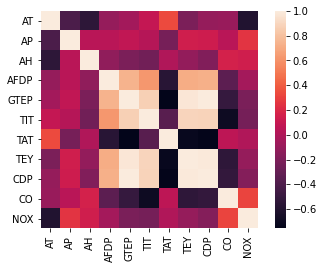

In [61]:
# Correlation between variables
c= df.corr()
sns.heatmap(c, vmax=1, square=True)

In [62]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [65]:
# separating independant and dependant variables
x= df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
print(x)
y= df['TEY']
print(y)

           AT      AP      AH    AFDP  ...     TAT     CDP      CO     NOX
0      6.8594  1007.9  96.799  3.5000  ...  550.00  10.605  3.1547  82.722
1      6.7850  1008.4  97.118  3.4998  ...  550.00  10.598  3.2363  82.776
2      6.8977  1008.8  95.939  3.4824  ...  549.87  10.601  3.2012  82.468
3      7.0569  1009.2  95.249  3.4805  ...  549.99  10.606  3.1923  82.670
4      7.3978  1009.7  95.150  3.4976  ...  549.98  10.612  3.2484  82.311
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
15034  9.0301  1005.6  98.460  3.5421  ...  546.21  10.400  4.5186  79.559
15035  7.8879  1005.9  99.093  3.5059  ...  543.22  10.433  4.8470  79.917
15036  7.2647  1006.3  99.496  3.4770  ...  537.32  10.483  7.9632  90.912
15037  7.0060  1006.8  99.008  3.4486  ...  541.24  10.533  6.2494  93.227
15038  6.9279  1007.2  97.533  3.4275  ...  545.85  10.583  4.9816  92.498

[15039 rows x 10 columns]
0        114.70
1        114.72
2        114.71
3        114.72
4        

In [107]:
# Standerdize the independant variables
x_standerdized= (x-x.mean())/x.std()

In [108]:
x_standerdized

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439730,-0.826616,1.281394,-0.921201,-1.379055,-1.488326,0.585221,-1.357286,0.531994,1.387799
1,-1.449553,-0.748623,1.304521,-0.921464,-1.363482,-1.482276,0.585221,-1.363631,0.568715,1.392956
2,-1.434674,-0.686227,1.219045,-0.944353,-1.351264,-1.476226,0.568696,-1.360911,0.552919,1.363540
3,-1.413655,-0.623832,1.169021,-0.946853,-1.348149,-1.464125,0.583950,-1.356379,0.548914,1.382832
4,-1.368648,-0.545839,1.161844,-0.924358,-1.354618,-1.458074,0.582678,-1.350940,0.574160,1.348546
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153144,-1.185388,1.401813,-0.865821,-1.498607,-2.063115,0.103449,-1.543109,1.145754,1.085714
15035,-1.303943,-1.138592,1.447705,-0.913440,-1.438712,-2.268829,-0.276629,-1.513196,1.293535,1.119905
15036,-1.386220,-1.076197,1.476921,-0.951457,-1.410920,-2.789165,-1.026616,-1.467873,2.695835,2.169990
15037,-1.420375,-0.998203,1.441542,-0.988815,-1.447576,-2.456392,-0.528319,-1.422551,1.924619,2.391085


In [109]:
# Tunig hyperparameters- Batch size and epochs
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [110]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

In [111]:
# create regression model
model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]
# Make a dictionary of grid search parameters
param_grid= dict(batch_size= batch_size, epochs=epochs)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... batch_size=50, epochs=10, score=-255.557, total=   2.7s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-27.035, total=   2.7s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-52.409, total=   2.8s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-56.008, total=   2.7s
[CV] batch_size=50, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.9s remaining:    0.0s


[CV] .......... batch_size=50, epochs=10, score=-81.963, total=   3.0s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.8s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.915, total=  11.0s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.9s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.458, total=  11.1s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   35.9s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-1.167, total=  11.2s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   47.1s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.533, total=  11.3s
[CV] batch_size=50, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   58.4s remaining:    0.0s


[CV] ........... batch_size=50, epochs=50, score=-0.916, total=  11.0s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.776, total=  21.4s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.462, total=  21.7s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.823, total=  21.6s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.614, total=  21.4s
[CV] batch_size=50, epochs=100 .......................................
[CV] .......... batch_size=50, epochs=100, score=-0.963, total=  21.8s
[CV] batch_size=100, epochs=10 .......................................
[CV] ........ batch_size=100, epochs=10, score=-321.318, total=   1.6s
[CV] batch_size=100, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  6.7min finished


In [113]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.7039520859718322, using {'batch_size': 100, 'epochs': 100}
-94.59455146789551,82.342196051359 with: {'batch_size': 50, 'epochs': 10}
-0.7979467153549195,0.26469448434439774 with: {'batch_size': 50, 'epochs': 50}
-0.7273344576358796,0.17336543410704175 with: {'batch_size': 50, 'epochs': 100}
-254.62334747314452,114.31618427834505 with: {'batch_size': 100, 'epochs': 10}
-2.7111358761787416,1.7475926632434546 with: {'batch_size': 100, 'epochs': 50}
-0.7039520859718322,0.08905221926371942 with: {'batch_size': 100, 'epochs': 100}
-748.8835021972657,304.21579889349374 with: {'batch_size': 200, 'epochs': 10}
-26.177952766418457,17.018102486481745 with: {'batch_size': 200, 'epochs': 50}
-1.6544944882392882,0.8851990213204778 with: {'batch_size': 200, 'epochs': 100}
-5193.364208984375,1316.6765387202865 with: {'batch_size': 400, 'epochs': 10}
-140.75717468261718,33.8190370519572 with: {'batch_size': 400, 'epochs': 50}
-22.424056625366212,10.865785830181698 with: {'batch_size': 400, 'epo

In [119]:
# Tuning hyperparameter: Learning rate and drop out rate
from keras.layers import Dropout

# defining model
def create_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam(learning_rate= learning_rate)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=100)
# Define grid search model
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.5]
dropout_rate=[0, 0.1, 0.2]
# Make a dictionary of grid search parameters
param_grid= dict(learning_rate= learning_rate, dropout_rate=dropout_rate)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.772, total=  12.6s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.405, total=  12.1s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.8s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.681, total=  12.1s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.8s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.480, total=  12.2s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   49.0s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=-0.763, total=  12.1s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-1.407, total=  12.1s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-0.427, total=  12.2s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-0.513, total=  12.2s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-0.606, total=  12.4s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


[CV] . dropout_rate=0, learning_rate=0.01, score=-1.515, total=  12.1s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-0.764, total=  12.1s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-0.871, total=  12.6s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-4.191, total=  11.8s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-2.319, total=  12.2s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV] .. dropout_rate=0, learning_rate=0.1, score=-0.872, total=  12.2s
[CV] dropout_rate=0, learning_rate=0.2 ...............................
[CV] .. dropout_rate=0, learning_rate=0.2, score=-0.852, total=  12.3s
[CV] dropout_rate=0, learning_rate=0.2 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 15.3min finished


In [120]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.6202531516551971, using {'dropout_rate': 0, 'learning_rate': 0.001}
-0.6202531516551971,0.15041367682159368 with: {'dropout_rate': 0, 'learning_rate': 0.001}
-0.8936102747917175,0.4679097411431064 with: {'dropout_rate': 0, 'learning_rate': 0.01}
-1.8033161759376526,1.3253189755385835 with: {'dropout_rate': 0, 'learning_rate': 0.1}
-1.4099546074867249,0.9257579540998265 with: {'dropout_rate': 0, 'learning_rate': 0.2}
-192.97868065834047,159.1038971961304 with: {'dropout_rate': 0, 'learning_rate': 0.5}
-15.576375484466553,10.96918756355158 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-6.387226819992065,2.4819729111856277 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-15.556726169586181,7.344458574561042 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-21.332647132873536,8.323171094069938 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
-157.07378082275392,86.41087196050059 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
-40.467848205566405,8.675514369562695 with:

In [122]:
# Tuning hyperparameters: Activation function and Kernal intitilizer
def create_model_af_ker_ini(activation_function,init):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= init, activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=100)
# Define grid search model
activation_function=['linear', 'relu']
init=['uniform', 'normal', 'zero']
# Make a dictionary of grid search parameters
param_grid= dict(activation_function= activation_function, init=init)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=linear, init=uniform, score=-0.921, total=  12.1s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.583, total=  12.1s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.2s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.751, total=  12.0s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.2s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.553, total=  12.2s
[CV] activation_function=linear, init=uniform ........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   48.4s remaining:    0.0s


[CV]  activation_function=linear, init=uniform, score=-0.897, total=  11.9s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.775, total=  12.1s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.444, total=  12.0s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.578, total=  12.1s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.458, total=  11.9s
[CV] activation_function=linear, init=normal .........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


[CV]  activation_function=linear, init=normal, score=-0.579, total=  12.1s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-15681.720, total=  12.6s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-13996.413, total=  12.1s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-16285.176, total=  12.0s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-15403.919, total=  12.1s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=-14512.598, total=  12.2s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=-0.696, total=  12.0s
[CV] activation_function=relu, init=unif

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.1min finished


In [123]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.5668147683143616, using {'activation_function': 'linear', 'init': 'normal'}
-0.7411278247833252,0.15301058356273062 with: {'activation_function': 'linear', 'init': 'uniform'}
-0.5668147683143616,0.11879992028700706 with: {'activation_function': 'linear', 'init': 'normal'}
-15175.9650390625,820.9139239393505 with: {'activation_function': 'linear', 'init': 'zero'}
-0.8436641454696655,0.3496725835345604 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.7295901656150818,0.2119623338575594 with: {'activation_function': 'relu', 'init': 'normal'}
-15175.9396484375,820.8971540605952 with: {'activation_function': 'relu', 'init': 'zero'}


In [124]:
# Tuning parameter: Number of neurons in activation layer
def create_model_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron2, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron3, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=100)
# Define grid search model
neuron1=[4,8,16]
neuron2=[4,8,16]
neuron3=[4,8,16]
# Make a dictionary of grid search parameters
param_grid= dict(neuron1= neuron1, neuron2=neuron2,neuron3=neuron3 )
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.825, total=  10.6s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.569, total=  10.8s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.4s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.723, total=  10.6s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.9s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.743, total=  10.3s
[CV] neuron1=4, neuron2=4, neuron3=4 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   42.3s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=4, score=-0.751, total=  10.7s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.9s remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.719, total=  10.6s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.445, total=  10.5s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.612, total=  10.6s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.622, total=  10.4s
[CV] neuron1=4, neuron2=4, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.6min remaining:    0.0s


[CV] .... neuron1=4, neuron2=4, neuron3=8, score=-0.630, total=  10.5s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-1.007, total=  11.0s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.564, total=  10.8s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.810, total=  10.6s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.569, total=  10.9s
[CV] neuron1=4, neuron2=4, neuron3=16 ................................
[CV] ... neuron1=4, neuron2=4, neuron3=16, score=-0.629, total=  11.0s
[CV] neuron1=4, neuron2=8, neuron3=4 .................................
[CV] .... neuron1=4, neuron2=8, neuron3=4, score=-0.930, total=  10.6s
[CV] neuron1=4, neuron2=8, neuron3=4 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 24.4min finished


In [125]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.5807726323604584, using {'neuron1': 16, 'neuron2': 8, 'neuron3': 8}
-0.7220181941986084,0.08416009438280064 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-0.6055780589580536,0.08882005933215655 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 8}
-0.7158999562263488,0.17093397176417297 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 16}
-0.6861926317214966,0.15740018839082623 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 4}
-0.6932720303535461,0.15690995162133586 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 8}
-0.6085978329181672,0.18775503341572802 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 16}
-0.6348135054111481,0.13044997059738617 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 4}
-0.5916290521621704,0.11655942939436241 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 8}
-0.7080458760261535,0.256148103591311 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 16}
-0.802600872516632,0.33088811859958867 with: {'neuron1': 8, 'neuron2': 4, 'neuron3': 4}
-0.6781694948673248,0.257015312

In [134]:
# model using optimum hyperparameters
# Tuning parameter: Number of neurons in activation layer
def create_model_opt():
  model= Sequential()
  model.add(Dense(16, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_opt, verbose=10, batch_size=100, epochs=100)
# Fitting model
estimator= model.fit(x_standerdized,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, x_standerdized,y, cv= kfold)
print('mse:', results.mean())

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [137]:
print('MSE',results.mean())

MSE -0.606938648223877
